<a href="https://colab.research.google.com/github/seanigens/IntroDataViz/blob/main/Practice_Activity_Penguin_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
pip install palmerpenguins

In [9]:
import pandas as pd
from palmerpenguins import load_penguins
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_curve, auc
import matplotlib.pyplot as plt

In [6]:
penguin = load_penguins()

In [8]:
print(penguin.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


In [7]:
features = ['species', 'island', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
target = 'species'

penguins = penguin.dropna(subset=features + [target])

penguins_dummies = pd.get_dummies(penguins[features])

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

Model: KNeighborsClassifier(n_neighbors=3)
Confusion Matrix:
[[23  1  5]
 [ 6  7  1]
 [ 3  0 21]]
Accuracy: 0.7611940298507462
Precision, Recall, F1-score per Class:
(array([0.71875   , 0.875     , 0.77777778]), array([0.79310345, 0.5       , 0.875     ]), array([0.75409836, 0.63636364, 0.82352941]), array([29, 14, 24]))

Model: KNeighborsClassifier(n_neighbors=7)
Confusion Matrix:
[[25  2  2]
 [ 9  4  1]
 [ 2  0 22]]
Accuracy: 0.7611940298507462
Precision, Recall, F1-score per Class:
(array([0.69444444, 0.66666667, 0.88      ]), array([0.86206897, 0.28571429, 0.91666667]), array([0.76923077, 0.4       , 0.89795918]), array([29, 14, 24]))

Model: DecisionTreeClassifier(max_depth=2, random_state=42)
Confusion Matrix:
[[28  1  0]
 [ 1 13  0]
 [ 0  2 22]]
Accuracy: 0.9402985074626866
Precision, Recall, F1-score per Class:
(array([0.96551724, 0.8125    , 1.        ]), array([0.96551724, 0.92857143, 0.91666667]), array([0.96551724, 0.86666667, 0.95652174]), array([29, 14, 24]))

Model: Deci

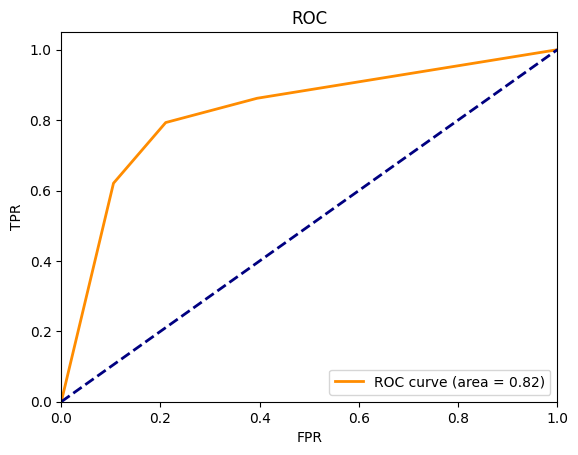

In [13]:
penguins = penguins.dropna()

penguins_dummies = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True)

X = penguins_dummies.drop('species', axis=1)
y = penguins_dummies['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)

knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)

dt_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_2.fit(X_train, y_train)

dt_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_5.fit(X_train, y_train)

models = [knn_3, knn_7, dt_2, dt_5]
for model in models:
    y_pred = model.predict(X_test)
    print(f"Model: {model}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision, Recall, F1-score per Class:")
    print(precision_recall_fscore_support(y_test, y_pred, average=None))
    print()

species = 'Adelie'
y_test_bin = (y_test == species).astype(int)
fpr, tpr, thresholds = roc_curve(y_test_bin, knn_3.predict_proba(X_test)[:, 0])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()